In [17]:
# Compute frequent itemsets using a minimum support of 0.07
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

onehot = pd.read_csv('onehot4.csv',index_col=0)
frequent_itemsets = apriori(onehot, min_support = 0.07, 
                            use_colnames = True, max_len = 2)

# Compute the association rules
rules = association_rules(frequent_itemsets, 
                          metric = 'support', 
                          min_threshold = 0.0)

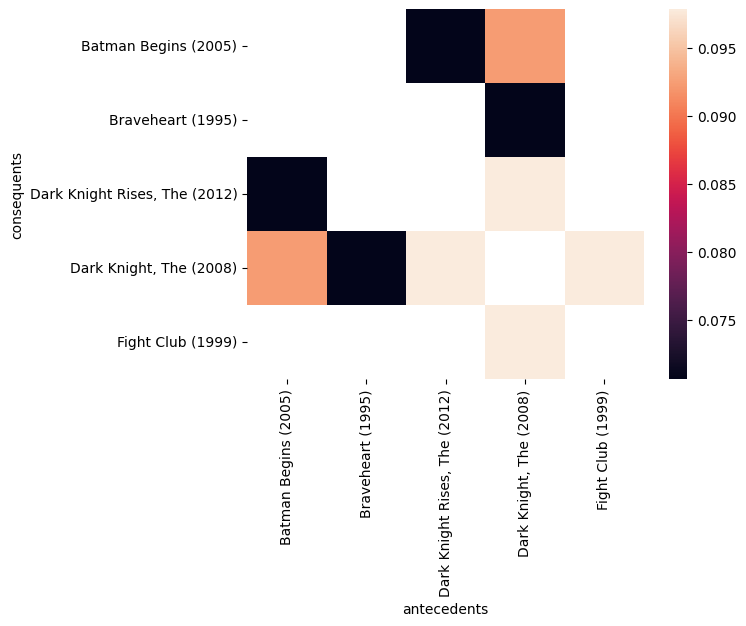

In [18]:
# Replace frozen sets with strings
import seaborn as sns
import matplotlib.pyplot as plt
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform data to matrix format and generate heatmap
pivot = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(pivot)

# Format and display plot
plt.yticks(rotation=0)
plt.show()

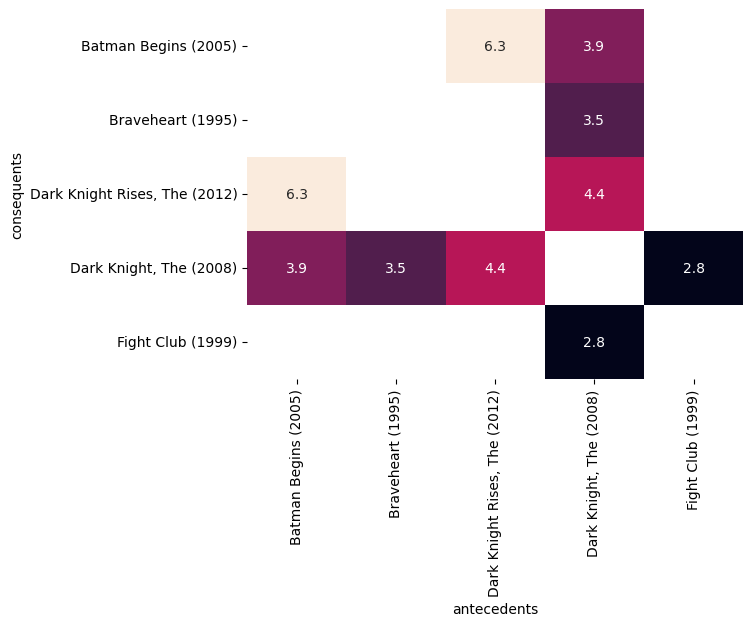

In [19]:
# Import seaborn under its standard alias
import seaborn as sns

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar = False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

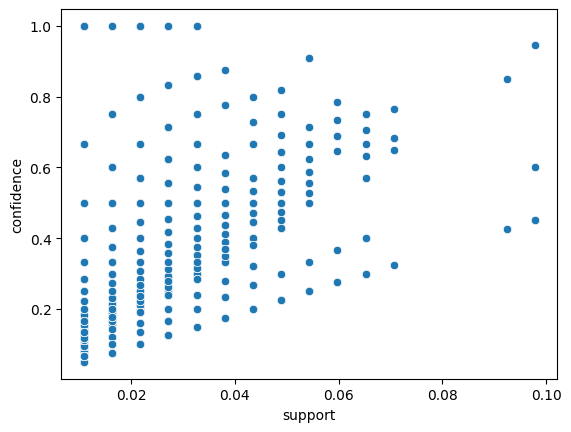

In [20]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.show()

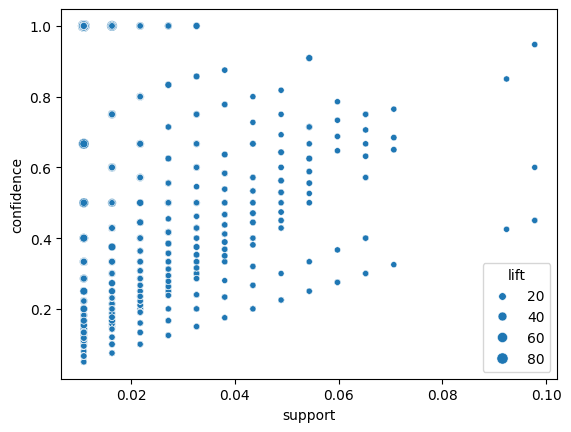

In [21]:
# Import seaborn under its standard alias
import seaborn as sns

# Apply the Apriori algorithm with a support value of 0.0075
frequent_itemsets = apriori(onehot, min_support = 0.0075, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric = "support", 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

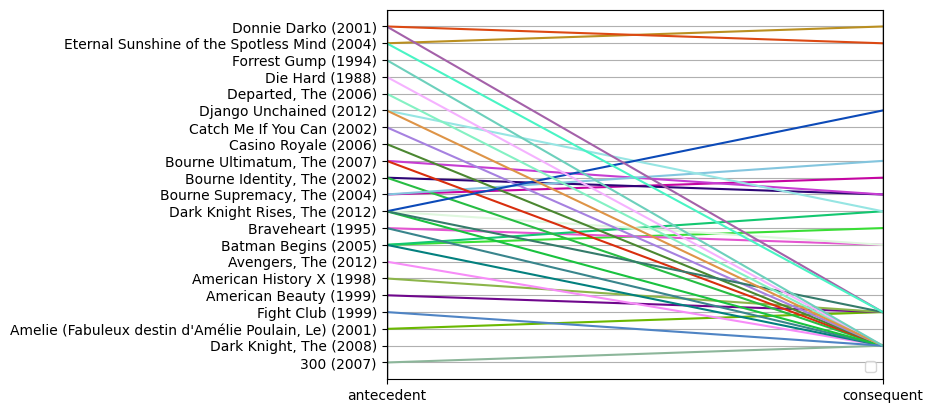

In [24]:
# Compute the frequent itemsets
frequent_itemsets = apriori(onehot, min_support = 0.05, 
                            use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets with the confidence metric
rules = association_rules(frequent_itemsets, metric = 'confidence', 
                          min_threshold = 0.50)
def rules_to_coordinates(rules):
	rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
	rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
	rules['rule'] = rules.index
	return rules[['antecedent','consequent','rule']]
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

from pandas.plotting import parallel_coordinates
# Generate parallel coordinates plot
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.show()

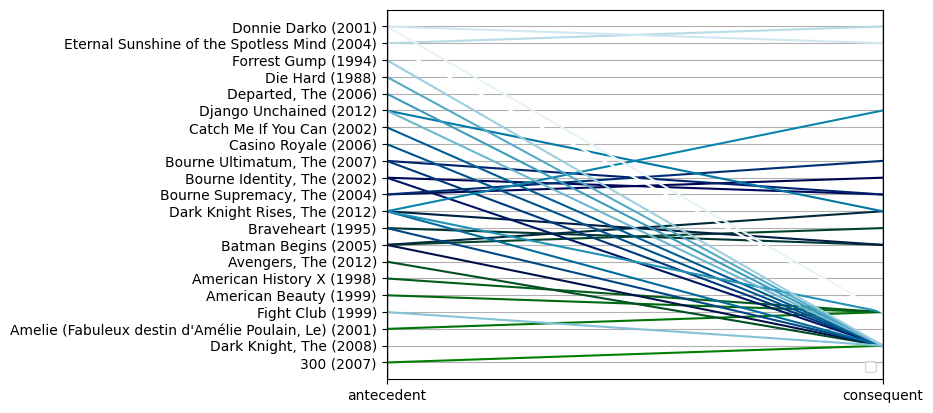

In [25]:
# Import the parallel coordinates plot submodule
from pandas.plotting import parallel_coordinates

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
parallel_coordinates(coords, 'rule', colormap = 'ocean')
plt.legend([])
plt.show()